In [1]:
import os #se balader dans l'OS
import random
import sys
import cv2 #computer vision
import tqdm
import pandas as pd
import numpy as np #traduction des images en matrice
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

2025-12-11 23:13:15.023512: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
folder_path = "../data"

In [3]:
# Train data preparation
classes = ["0","1"]

def create_data(chemin:str):
    dataset = []
    for i in classes:
        path = os.path.join(folder_path,chemin,i)
        class_num = classes.index(i)
        for img in tqdm.tqdm(os.listdir(path)):
            try:
                img_path = os.path.join(path,img)
                img_array = cv2.imread(img_path)
                resized_array = cv2.resize(img_array,(224,224))
                dataset.append([resized_array,class_num])
            except Exception as e:
                pass
    return dataset
        

In [4]:
dataset_train = create_data(chemin="train")

100%|██████████| 803/803 [00:03<00:00, 204.68it/s]


In [5]:
dataset_test = create_data(chemin="test")

100%|██████████| 128/128 [00:00<00:00, 182.15it/s]


In [6]:
dataset_val = create_data(chemin="valid")

100%|██████████| 227/227 [00:01<00:00, 206.79it/s]


In [8]:
def X_y_split(dataset):
    X_images = []
    y_images = []

    for img, label in dataset:
        X_images.append(img)
        y_images.append(label)  
    X = np.array(X_images) / 255
    y = np.array(y_images)
    print(f"Fait pour {dataset}")
    return X, y 

In [9]:
X_train, y_train = X_y_split(dataset_train)
X_test,y_test = X_y_split(dataset_test)
X_val,y_val = X_y_split(dataset_val)

Fait pour [[array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [219, 219, 219],
        [225, 225, 225],
        [210, 210, 210]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [207, 207, 207],
        [217, 217, 217],
        [215, 215, 215]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0

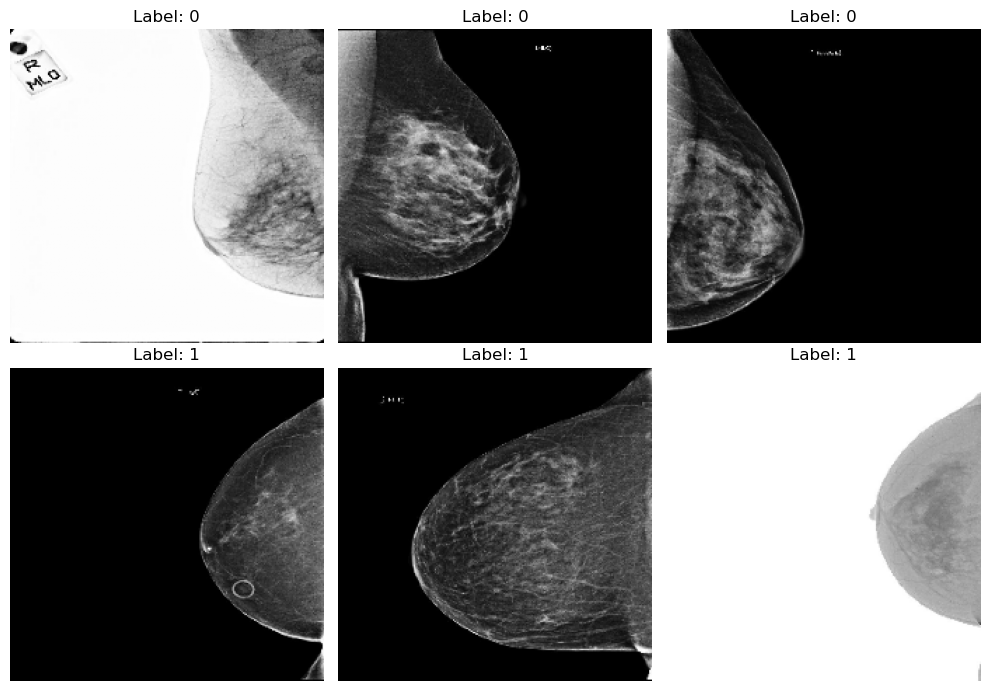

In [10]:
num_samples = 6
random_samples = np.random.choice(len(X_train), size = num_samples,replace=False)

fig,axes = plt.subplots(2,3,figsize=(10,7))
for i,idx in enumerate(random_samples):
     ax = axes[i//3,i%3]
     ax.imshow(X_train[idx],cmap="gray")
     ax.set_title(f"Label: {y_train[idx]}")
     ax.axis('off')

plt.tight_layout()
plt.show()

# Découpe en un jeu d'entrainement et un jeu de Test

In [11]:
#création d'une séquence de couches
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu' , input_shape = (224,224,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(100,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.2)) #20% des neurones sont éteints à chaque tour
model.add(Dense(1,activation = 'sigmoid')) #on connaîtra la proba que ce soit un cancer


model.summary()

2025-12-11 23:15:52.283696: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 100)       57700     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 100)      0

In [12]:
model.compile(optimizer = "adam",loss="binary_crossentropy", metrics = ["accuracy"])

In [13]:
history = model.fit(X_train,y_train,epochs=30, validation_data = (X_test,y_test))

Epoch 1/30
75/75 [==============================] - 164s 2s/step - loss: 0.6533 - accuracy: 0.6480 - val_loss: 0.6648 - val_accuracy: 0.6399
Epoch 2/30
75/75 [==============================] - 163s 2s/step - loss: 0.6298 - accuracy: 0.6737 - val_loss: 0.6508 - val_accuracy: 0.6518
Epoch 3/30
75/75 [==============================] - 151s 2s/step - loss: 0.6011 - accuracy: 0.6775 - val_loss: 0.6473 - val_accuracy: 0.6399
Epoch 4/30
75/75 [==============================] - 137s 2s/step - loss: 0.5724 - accuracy: 0.6981 - val_loss: 0.6753 - val_accuracy: 0.6577
Epoch 5/30
75/75 [==============================] - 138s 2s/step - loss: 0.5400 - accuracy: 0.7222 - val_loss: 0.6681 - val_accuracy: 0.6369
Epoch 6/30
75/75 [==============================] - 142s 2s/step - loss: 0.4819 - accuracy: 0.7631 - val_loss: 0.7144 - val_accuracy: 0.6339
Epoch 7/30
75/75 [==============================] - 139s 2s/step - loss: 0.4218 - accuracy: 0.7926 - val_loss: 0.7739 - val_accuracy: 0.6310
Epoch 8/30
75

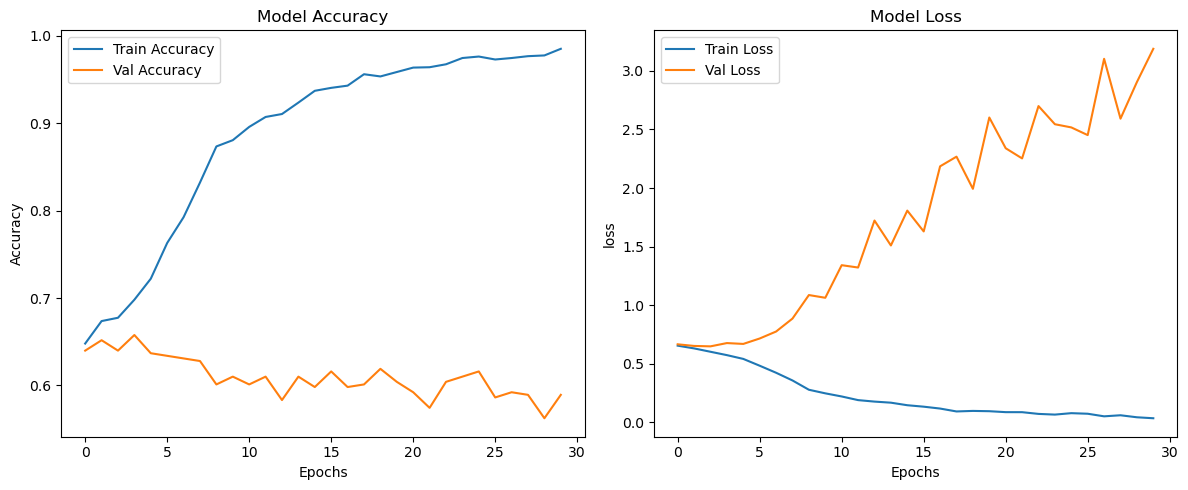

In [14]:
plt.figure(figsize=(12,5))

#Accuracy subplot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#Loss subplot

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()

Modèle qui apprend très mal. Pas de généralisation possible. Possible overfitting.

In [ ]:
history.history['loss']

[0.6532600522041321,
 0.6298308968544006,
 0.6010560393333435,
 0.5723597407341003,
 0.5400367379188538,
 0.48185494542121887,
 0.4217919111251831,
 0.3559156060218811,
 0.2765887379646301,
 0.2459070235490799,
 0.21922335028648376,
 0.18803535401821136,
 0.1753806620836258,
 0.16614796221256256,
 0.14440414309501648,
 0.13195236027240753,
 0.11593008041381836,
 0.0912342518568039,
 0.0958048477768898,
 0.09331212192773819,
 0.08524839580059052,
 0.08499997109174728,
 0.0702451765537262,
 0.06432245671749115,
 0.0765681192278862,
 0.07167908549308777,
 0.04955880343914032,
 0.05861332640051842,
 0.04143694415688515,
 0.03313782066106796]